In [5]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#acess data
os.chdir('C:\\Users\\georg\\OneDrive\\Desktop\\data')

df=pd.read_csv('dataset.csv')

#counting missing columns
'''
for i in df.columns:
  print(sum(pd.isnull(df[i]))) #searching the columns (4,5, & 19th columns) 

print(str(sum(pd.isnull(df[df.columns[5]]))/len(df[df.columns[5]])*100)+'% of the data is missing, the feature is '+df.columns[5]+" which isn't important right now so let's just drop it all")
'''


#drop the columns for the analysis
df=df.drop_duplicates()
#df=df.dropna()
df=df.drop(columns=[df.columns[5]])

# Make a bar chart that displays how many times each brand of car appears in this data. 
freq={}
for i in df["WHOIS_COUNTRY"]:
    if i not in freq:
        freq[i]=1
    else:
        freq[i]+=1
       
#Make the horizontal barchart (for countries)
keys = list(freq.keys())
values = list(freq.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index} # I visualized the data, everyother value is fodder

#visualie those with values greater than 5
real_sorted_dict={}
for i in sorted_dict:
  if sorted_dict[i]>5 and i!='None':
    real_sorted_dict[i]=sorted_dict[i]

x_lab=list(real_sorted_dict.values())
y_lab=list(real_sorted_dict.keys())





# Make a bar chart that displays how many times each brand of car appears in this data. 
freq={}
for i in df[df.columns[6]]:
    if i not in freq:
        freq[i]=1
    else:
        freq[i]+=1
        
#Make the horizontal barchart (for "states")
keys = list(freq.keys())
values = list(freq.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index} # I visualized the data, everyother value is fodder

#visualie those with values greater than 5
real_sorted_dict={}
for i in sorted_dict:
  if sorted_dict[i]>8 and i!='None':
    real_sorted_dict[i]=sorted_dict[i]

x_lab=list(real_sorted_dict.values())
y_lab=list(real_sorted_dict.keys())



#lets clean and organize the data
df_grouped=df.groupby('WHOIS_COUNTRY')




In [6]:
df_bening = df[df['Type'] == 0]
df_malignant=df[df['Type']== 1]

df_malignant.groupby('WHOIS_STATEPRO').Type.sum()
df_malignant.groupby('WHOIS_COUNTRY').Type.sum()
#df_bening.groupby('WHOIS_STATEPRO').Type.count()



WHOIS_COUNTRY
BR     2
CA     2
CN     3
CZ     8
DE     1
ES    62
FR     1
GB     4
IN     1
KR     2
PA     2
PK     1
RU     2
UA     2
UG     1
UK     1
US    49
UY     2
ru     4
us     1
Name: Type, dtype: int64

In [7]:
df

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


In [8]:
49/len(df['Type'])


0.027512633352049412

In [9]:
#phish data
df_phish=pd.read_csv('malicious_phish.csv')
df_phish.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [10]:
#How many websites that have the '.com' or '.net' or '.org' extension are scam websites?
#Which extension is the most malicious
com_bad,net_bad,org_bad=0,0,0
com_safe=0
net_safe=0
org_safe=0

for i in range(len(df_phish['url'])):
    if '.com' in df_phish['url'][i] and df_phish['type'][i]=='benign' and 'www.com' not in df_phish['url'][i]:
        com_safe+=1
    elif '.com' in df_phish['url'][i] and df_phish['type'][i]!='benign':
        com_bad+=1
    elif '.net' in df_phish['url'][i] and df_phish['type'][i]=='benign' and 'www.net' not in df_phish['url'][i]:
        net_safe+=1
    elif '.net' in df_phish['url'][i] and df_phish['type'][i]!='benign':
        net_bad+=1
    elif '.org' in df_phish['url'][i] and df_phish['type'][i]=='benign' and 'www.org' not in df_phish['url'][i]:
        org_safe+=1
    elif '.org' in df_phish['url'][i] and df_phish['type'][i]!='benign':
        org_bad+=1
        
print(com_bad/(com_bad+com_safe)) #25% of com extensions are malicious
print(net_bad/(net_bad+net_safe)) #32% of net extensions are malicious
print(org_bad/(org_bad+org_safe)) #27% of com extensions are malicious

#which extensions are the most malicious?


0.2476501838986514
0.3208960104643558
0.2771141901576684


In [11]:
df_phish['url'][0:40]

0                                      br-icloud.com.br
1                   mp3raid.com/music/krizz_kaliko.html
2                       bopsecrets.org/rexroth/cr/1.htm
3     http://www.garage-pirenne.be/index.php?option=...
4     http://adventure-nicaragua.net/index.php?optio...
5     http://buzzfil.net/m/show-art/ils-etaient-loin...
6         espn.go.com/nba/player/_/id/3457/brandon-rush
7        yourbittorrent.com/?q=anthony-hamilton-soulife
8          http://www.pashminaonline.com/pure-pashminas
9         allmusic.com/album/crazy-from-the-heat-r16990
10    corporationwiki.com/Ohio/Columbus/frank-s-bens...
11    http://www.ikenmijnkunst.nl/index.php/expositi...
12                       myspace.com/video/vid/30602581
13    http://www.lebensmittel-ueberwachung.de/index....
14    http://www.szabadmunkaero.hu/cimoldal.html?sta...
15     http://larcadelcarnevale.com/catalogo/palloncini
16         quickfacts.census.gov/qfd/maps/iowa_map.html
17    nugget.ca/ArticleDisplay.aspx?archive=true

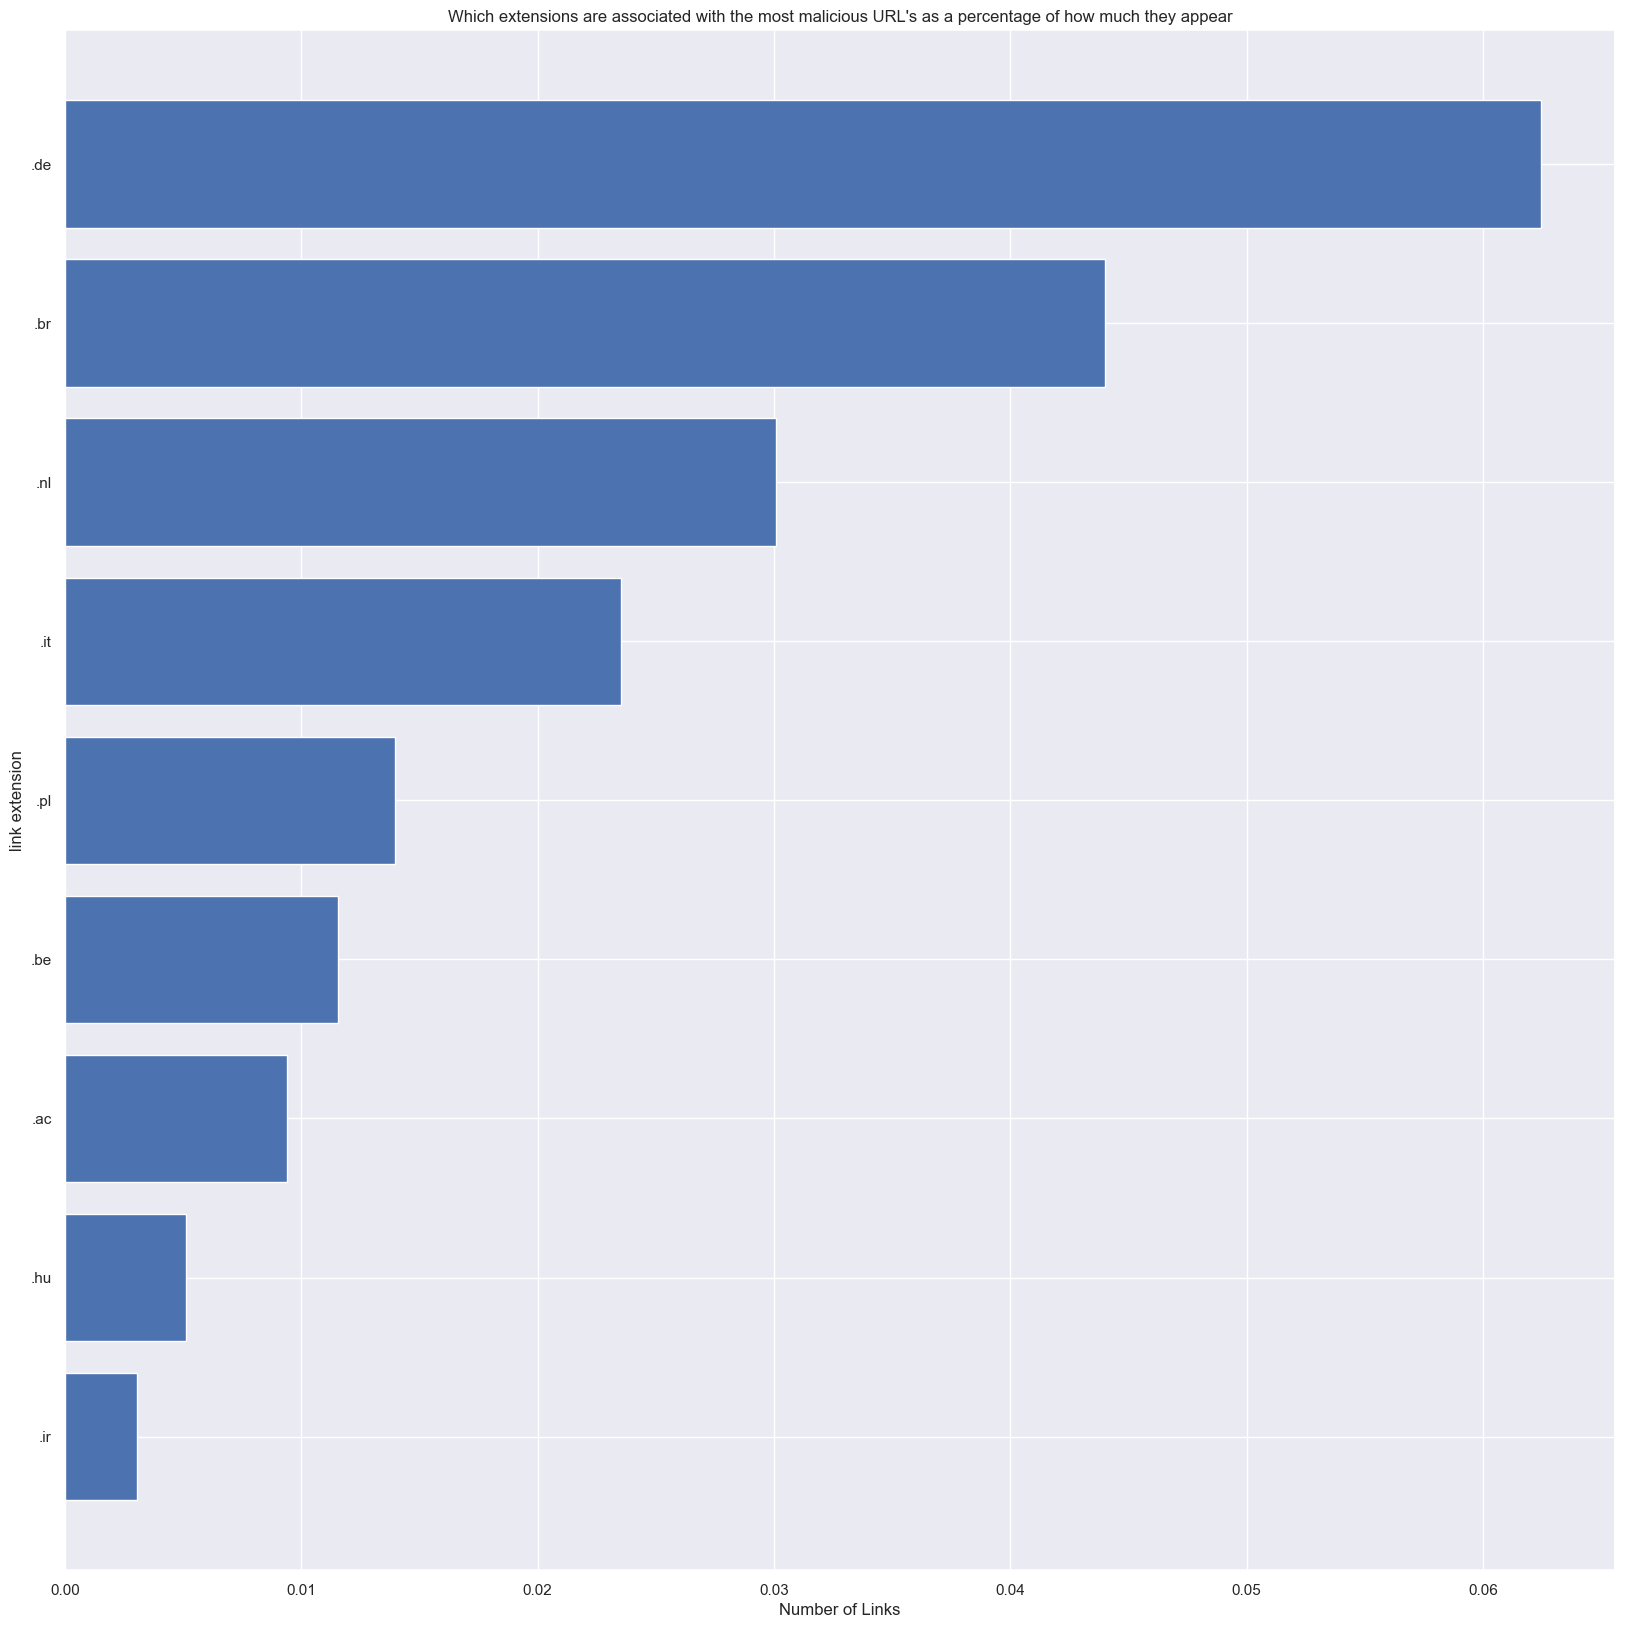

In [12]:
df_malignant=df_phish[df_phish['type']!='benign']
df_malignant=df_malignant.reset_index()
list_of_extensions=['.nl','.be','.hu','.it','.ir','.pl','.de','.br','.ac']
times_extensions_appear={'.nl':0,'.be':0,'.hu':0,'.it':0,'.ir':0,'.pl':0,'.de':0,'.br':0,'.ac':0}

for i in range(len(df_malignant['url'])):
    for j in range(len(list_of_extensions)):
        word=list_of_extensions[j]
        if word in df_malignant['url'][i] and 'www.'+word not in df_malignant['url'][i]:
            times_extensions_appear[word]+=1

keys = list(times_extensions_appear.keys())
values = list(times_extensions_appear.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
sorted_dict

x_lab=list(sorted_dict.values())
for i in range(len(x_lab)):
    x_lab[i]/=len(df_malignant)
y_lab=list(sorted_dict.keys())

plt.figure(figsize=(20,20))
plt.barh(y_lab,x_lab)
plt.xlabel("Number of Links")
plt.ylabel("link extension")
plt.title("Which extensions are associated with the most malicious URL's as a percentage of how much they appear")
plt.show()

In [13]:
times_extensions_appear


{'.nl': 6710,
 '.be': 2576,
 '.hu': 1145,
 '.it': 5251,
 '.ir': 676,
 '.pl': 3115,
 '.de': 13935,
 '.br': 9821,
 '.ac': 2098}

In [14]:
14000/223088

0.06275550455425662

In [20]:
df_mal=df[df['Type']==1]
df_server=df_mal.groupby('SERVER').sum()
x=df_server[df_server.columns[-1]] # Apache and nginx is the most malicious server 216 is the sum

A=122/216
N=66/216
M=16/216
O=1-A-N-M
print(A)
print(N)
print(M)
print(O)
x

0.5648148148148148
0.3055555555555556
0.07407407407407407
0.05555555555555558


SERVER
Apache                                                                                       91
Apache/1.3.27 (Unix) PHP/4.4.1                                                                1
Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20                                      1
Apache/2                                                                                      2
Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL/0.9.8y DAV/2 PHP/5.2.12 with Suhosin-Patch    13
Apache/2.2.15 (CentOS)                                                                        1
Apache/2.2.22 (Debian)                                                                        5
Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips mod_bwlimited/1.4                     1
Apache/2.2.31 (CentOS)                                                                        2
Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4                                    4
Apache/2.4.6 (CentOS)            

In [143]:
df_good=df[df['Type']==0]
df_bad=df[df['Type']==1]
df_good.groupby('Type').mean()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
Type,,,,,,,,,,,,
0,55.302236,10.637061,16.865815,6.144409,3.159744,3216.795527,19.072204,19.313099,17030.366773,3384.692652,19.072204,2.188619


In [144]:
df_bad.groupby('Type').mean()
df

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


In [145]:
"""
Short summary of the results:

SMALL DATA SET REPORT:
Malicious URLs tend to be around 15 characters longer than bening URLs on average
Apache and nginx are the most malicious server containing almost all the malicious URLs
33% of normal looking websites (with extensions like ".com", ".net", or ".org") are malicious
The United States has the most malicious URLs of any other country (this is probably due to lack of data)
6% of malicious websites use other URL extensions

LARGE DATA SET REPORT:
14.5% of websites want to steal your information (like passwords, credit card, ect)
14.8 of websites defame
5% of sites are malware (trying to damage your computer)
65.7% of sites are safe 34.3% are unsafe
NY and California are the biggest hotspots for malicious URLs (makes sense given the population as well as the fact that we are financial hubs of the world)

14.5% of malicious sites are malware
42% are trying to steal your information
43% are defacing

Questions:
Why is the US the highest and not India, China, or Russia (many of the listed regions were "unknown" so i feel like it could be from there) 
"""

'\nShort summary of the results:\n\nMalicious URLs tend to be around 15 characters longer than bening URLs on average\nApache and nginx are the most malicious server containing almost all the malicious URLs\n33% of normal looking websites (with extensions like ".com", ".net", or ".org") are malicious\nThe United States has the most malicious URLs of any other country\n6% of malicious websites use other URL extensions\n\n\n'

In [148]:
df

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


In [149]:
df_phish

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [152]:
df_p=df_phish[df_phish['type']=='phishing']

In [155]:
#len(df_p)/len(df_p)

1.0

In [27]:
x=df['WHOIS_COUNTRY']
y={}
for i in x:
    if i in y:
        y[i]+=1
    else:
        y[i]=1
y #1781-306=  total


{nan: 306,
 'US': 1103,
 'SC': 3,
 'GB': 19,
 'UK': 10,
 'RU': 2,
 'AU': 35,
 'CA': 84,
 'PA': 21,
 'se': 1,
 'IN': 10,
 'LU': 1,
 'TH': 1,
 "[u'GB'; u'UK']": 5,
 'FR': 9,
 'NL': 6,
 'UG': 1,
 'JP': 11,
 'CN': 10,
 'SE': 3,
 'SI': 2,
 'IL': 2,
 'ru': 4,
 'KY': 3,
 'AT': 4,
 'CZ': 9,
 'PH': 4,
 'BE': 3,
 'NO': 2,
 'TR': 3,
 'LV': 1,
 'DE': 3,
 'ES': 63,
 'BR': 2,
 'us': 3,
 'KR': 5,
 'HK': 3,
 'UA': 2,
 'CH': 6,
 'United Kingdom': 1,
 'BS': 4,
 'PK': 1,
 'IT': 1,
 'Cyprus': 2,
 'BY': 1,
 'AE': 1,
 'IE': 1,
 'UY': 2,
 'KG': 2}

In [166]:
df_p=df_phish[df_phish['type']!='benign']
L={}
for i in df_p['type']:
    if i not in L:
        L[i]=1
    else:
        L[i]+=1
print(L)

{'phishing': 94111, 'defacement': 96457, 'malware': 32520}


In [171]:
96457/len(df_p)

0.4323719787707093

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('dataset.csv')
df_bad=df[df['Type']==1]
df_good=df[df['Type']==0]
df_bad.groupby('Type').mean()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
Type,,,,,,,,,,,,,
1,68.981481,14.550926,2297.943396,11.87963,0.606481,2.342593,1283.615741,14.685185,14.638889,7648.611111,1495.726852,14.685185,2.805556


In [27]:
df_good.groupby('Type').mean()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
Type,,,,,,,,,,,,,
0,55.302236,10.637061,12885.06489,16.865815,6.144409,3.159744,3216.795527,19.072204,19.313099,17030.366773,3384.692652,19.072204,2.188619


In [84]:
#do this with content length, url length, & number of special characters
def makeplot(string):
    list_of_bad_lengths=[]
    list_of_good_lengths=[]
    good_list=[]
    bad_list=[]
    
    for i in df_bad[string]:
        list_of_bad_lengths.append(i)
        
    for i in df_good[string]:
        list_of_good_lengths.append(i)
    
    for i in list_of_good_lengths:
        if i>-1:
            good_list.append(i)
    
    for i in list_of_bad_lengths:
        if i>-1:
            bad_list.append(i)
    good_ones=[0]*len(good_list)
    bad_ones=[1]*len(bad_list)
    #plt.boxplot(good_list)
    plt.boxplot(bad_list)
    plt.xlabel('Malicious')
    plt.ylabel('Length of special characters')
    plt.title('Box plot showing all the data of '+string)
    

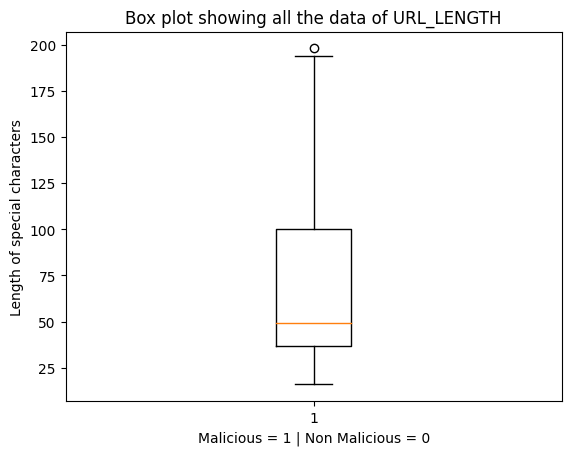

In [85]:
makeplot('URL_LENGTH')

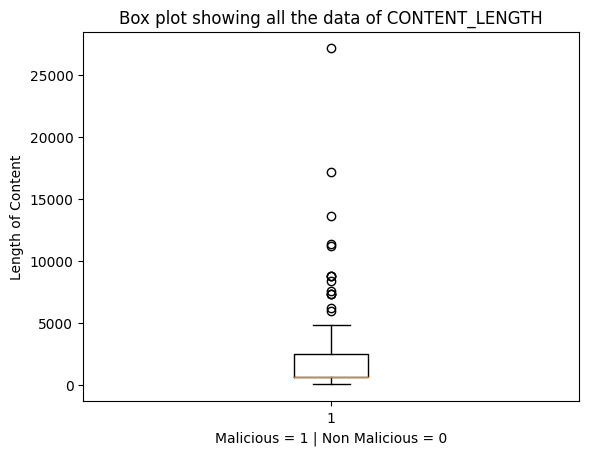

In [79]:
makeplot('CONTENT_LENGTH')

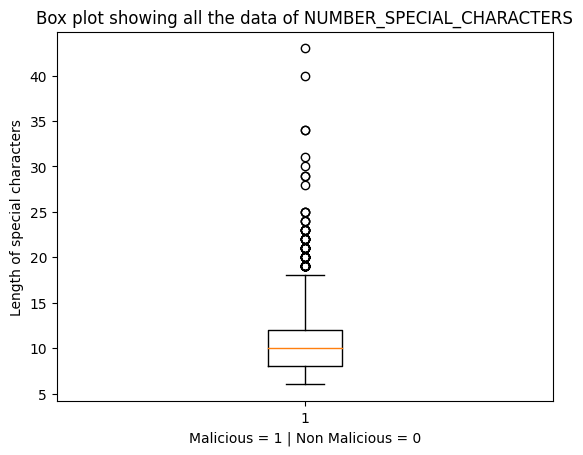

In [83]:
makeplot('NUMBER_SPECIAL_CHARACTERS')

In [86]:
""" My Recommendations:
1) Make a scatter plot with the x-axis being url length and y being benign or malicious
2) Plot showing which extension is most associated with which type of malicious site (malware, phishing, defacement)
3) Plot the relationship between servers and malicious URLS as a bar chart
4) Pie chart showing the percentages of the different  types of malicious sites as well as safe sites
5) Make a box and whisker plot showing the distributions of the lengths of malicious and non-malicious urls
""" 

' My Recommendations:\nMake a scatter plot with the x-axis being url length and y being benign or malicious\nPlot showing which extension is most associated with which type of malicious site (malware, phishing, defacement)\nPlot the relationship between servers and malicious URLS as a bar chart\nPie chart showing the percentages of the different  types of malicious sites as well as safe sites\nMake a box and whisker plot showing the distributions of the lengths of malicious and non-malicious urls\n'

In [106]:
# 1) Make a scatter plot with the x-axis being url length and y being benign or malicious
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('dataset.csv')
df_bad=df[df['Type']==1]
df_good=df[df['Type']==0]
df_bad.groupby('Type').mean()

#do this with content length, url length, & number of special characters and chnage between box and scatter 
def makeplot(string,xlab):
    list_of_bad_lengths=[]
    list_of_good_lengths=[]
    good_list=[]
    bad_list=[]
    
    for i in df_bad[string]:
        list_of_bad_lengths.append(i)
        
    for i in df_good[string]:
        list_of_good_lengths.append(i)
    
    for i in list_of_good_lengths:
        if i>-1:
            good_list.append(i)
    
    for i in list_of_bad_lengths:
        if i>-1:
            bad_list.append(i)
    good_ones=[0]*len(good_list)
    bad_ones=[1]*len(bad_list)
    plt.scatter(good_list,good_ones)
    plt.scatter(bad_list,bad_ones)
    #plt.boxplot(bad_list)
    plt.xlabel(xlab)
    plt.ylabel('Length of '+string)
    plt.title('Scatter plot showing all the data of '+string)


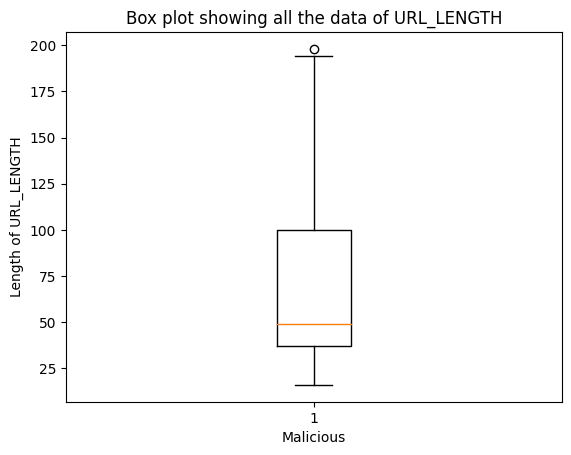

In [92]:
makeplot('URL_LENGTH','Malicious')

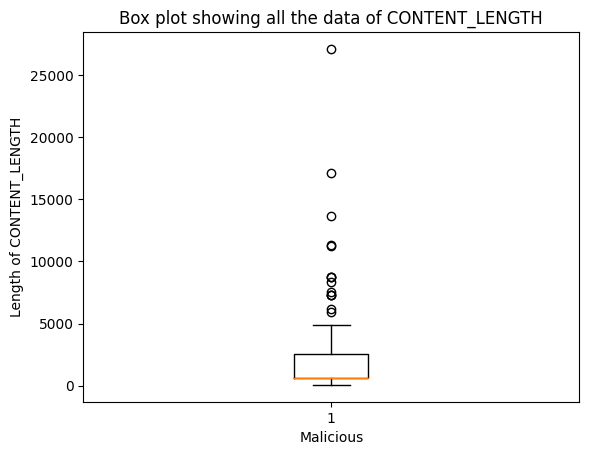

In [93]:
makeplot('CONTENT_LENGTH','Malicious')

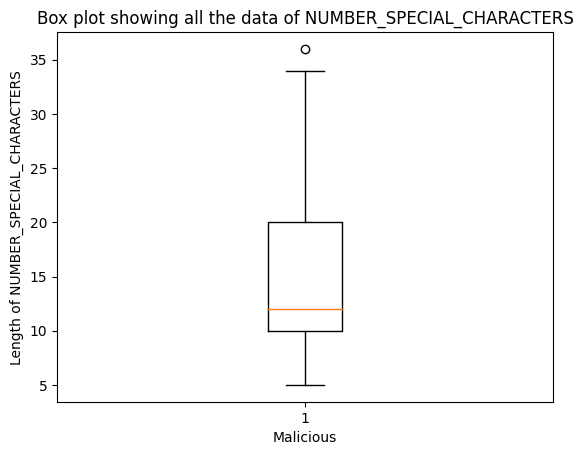

In [95]:
makeplot('NUMBER_SPECIAL_CHARACTERS','Malicious')

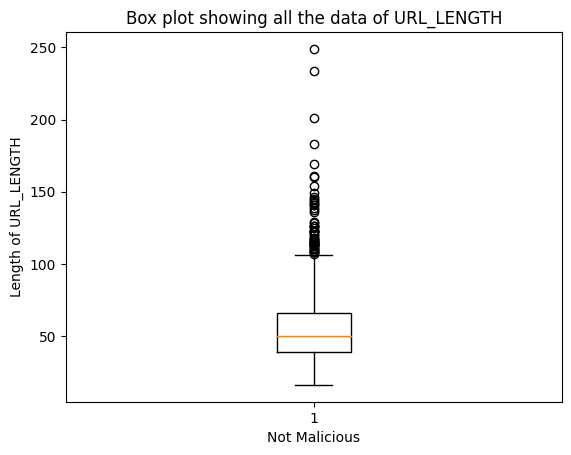

In [97]:
makeplot('URL_LENGTH','Not Malicious')

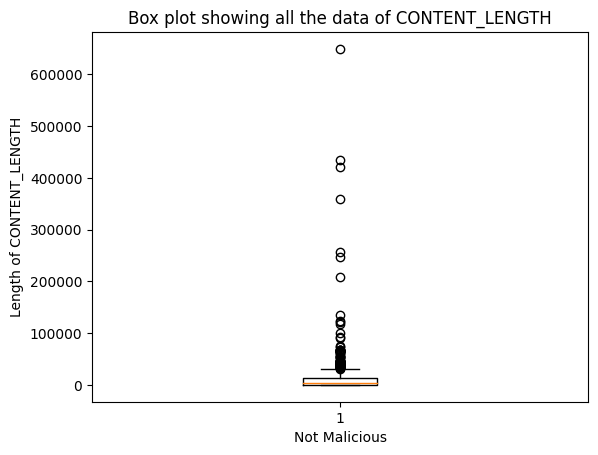

In [99]:
makeplot('CONTENT_LENGTH','Not Malicious')

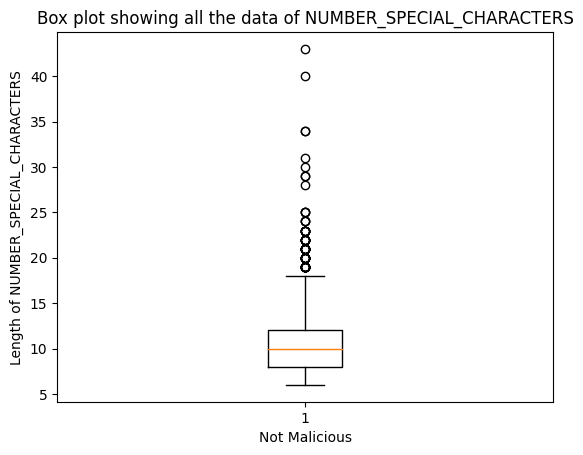

In [100]:
makeplot('NUMBER_SPECIAL_CHARACTERS','Not Malicious')

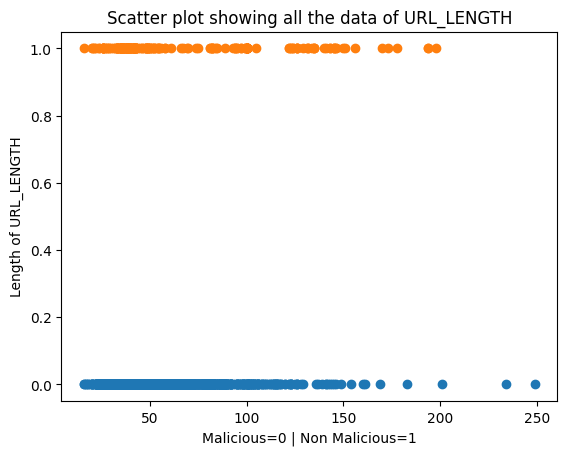

In [107]:
makeplot('URL_LENGTH','Malicious=0 | Non Malicious=1')

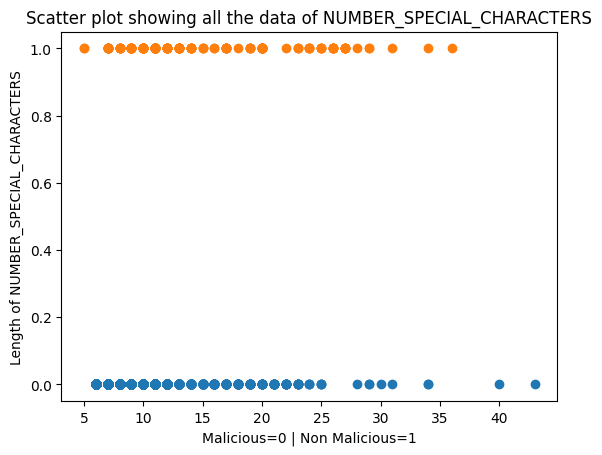

In [108]:
makeplot('NUMBER_SPECIAL_CHARACTERS','Malicious=0 | Non Malicious=1')

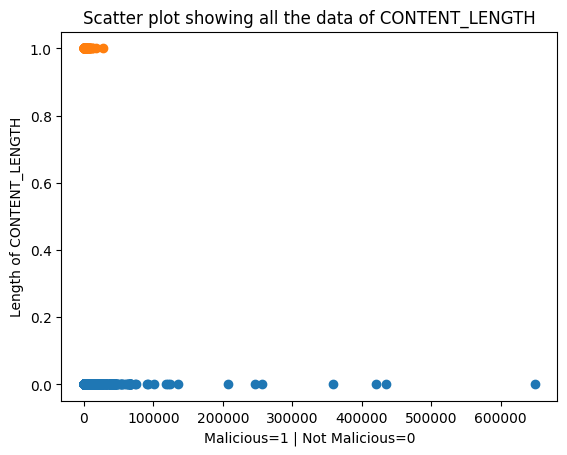

In [109]:
makeplot('CONTENT_LENGTH','Malicious=1 | Not Malicious=0')